# Tp LoRa

L'objectif de ce TP est d'apprendre à utiliser la technologie LoRa avec la carte LoPy4 de Pycom. Nous allons configurer et tester deux scénarios :

Envoi de données vers The Things Network (TTN).
Communication directe entre deux cartes LoPy4.

Matériel requis :
- 2 cartes LoPy4 de Pycom
- 2 antennes 
- 2 batteries ou câbles USB pour l'alimentation
- 1 ordinateur avec Visual Studio Code et l'extension PyMakr installée


## envoi des données vers Tne Things Network

### Configuration de la passerelle

(partie a réaliser uniquement si la passerelle n'est pas deja configurée)

Pour configurer la passerelle, il faut etre sur le même réseau et se rendre a l'adresse 147.127.245.250
- Username : admin
- Password : centrale2022

<img src="img/gw_connexion.png" alt="Drawing" style="width: 600px;"/>

Configurer les paramètres de réseau en mode passerelle 
- LoraWan -> Network Settings
    - mode : packet Forwarder
    - Channel Plan : EU868

<img src="img/gw_paramNet.png" alt="Drawing" style="width: 600px;"/>




### Connexion avec The Things Network

Connectez votre carte LoPy4 à votre ordinateur via USB.

Accedez au site https://eu1.cloud.thethings.network/console/
- id :  duiot
- mdp : duiot2020

Pour vérifier que la passerelle es bien configurée cliquez sur gateway, ici, on peut voir si la passerelle est connectée ou non.

<img src="img/ttn_gw.png" alt="Drawing" style="width: 600px;"/>

Vous devez alors voir "connecte a coté de votre passerelle

<img src="img/ttn_gw.png" alt="Drawing" style="width: 600px;"/>

Occupons nous maintenant de créer notre application
- cliquez sur applications

<img src="img/ttn_cnx.png" alt="Drawing" style="width: 600px;"/>

Vous avez maintenant la liste des applications déjà crées, créez votre propre application
- cliquez sur "create application"

<img src="img/ttn_app.png" alt="Drawing" style="width: 600px;"/>

Vous allez donc renseigner toutes les informations de votre application 
- remplir les infos de l'application

<img src="img/ttn_createApp.png" alt="Drawing" style="width: 600px;"/>

Une fois dans l'application, vous devez enregistrer les appareils liés à l'application
- cliquez sur "Register end device"

<img src="img/ttn_registerDevice.png" alt="Drawing" style="width: 600px;"/>

Vous devez ensuite rentrer les informations de votre appareil pour que celui-ci soit reconnu par l'application
- cliquez sur "Enter end device specifics manually"
- renseignez les informations de votre carte 
    - Europe 863-870 MHz (SF9 for RX2 - recommended)
    - LoRaWAN Specification 1.0.0
    - TS001 Technical Specification 1.0.0
    - AppEUI, DevEUI, ... voir le tableur sur moodle 

<img src="img/ttn_appCree.png" alt="Drawing" style="width: 600px;"/>

Vous pouvez maintenant avoir accès au panel de votre application, ici, vous pouvez voir toutes les communications et informations de votre application.
Sur le volet de gauche vous pouvez aussi avoir accès a différents onglets qui détaillent ces informations, vous avez aussi la possibilité de générer une clé API pour récupérer les données recues par TTN

<img src="img/ttn_appPanel.png" alt="Drawing" style="width: 600px;"/>



### code du LoPy4

Sur Vs Code, l'extension pymakr doit etre installée.

Le code suivant permet de connaitre le statut de la connexion avec the things network
- ouvrir le dosier /home/local/Documents/StageIoT/pymakr/project dans vs code
- le code suivant doit etre dans main.py
    - penser à changer app_eui, app_key et dev_eui par les valeurs rentrées dans The Things Network

In [ ]:
from network import LoRa
import socket
import time
import ubinascii
import pycom

pycom.heartbeat(False)

# Initialise LoRa in LORAWAN mode.
# Please pick the region that matches where you are using the device:
# Asia = LoRa.AS923
# Australia = LoRa.AU915
# Europe = LoRa.EU868
# United States = LoRa.US915
lora = LoRa(mode=LoRa.LORAWAN, region=LoRa.EU868)

# create an OTAA authentication parameters, change them to the provided credentials
app_eui = ubinascii.unhexlify('70B3D57ED0038811')
app_key = ubinascii.unhexlify('583FE2F370E3F43BCFE06291DCD155A1')
#uncomment to use LoRaWAN application provided dev_eui
dev_eui = ubinascii.unhexlify('70b3d5499e370b3d')

# join a network using OTAA (Over the Air Activation)
#uncomment below to use LoRaWAN application provided dev_eui
#lora.join(activation=LoRa.OTAA, auth=(app_eui, app_key), timeout=0)
lora.join(activation=LoRa.OTAA, auth=(dev_eui, app_eui, app_key), timeout=0)

# wait until the module has joined the network
while not lora.has_joined():
    pycom.rgbled(0x101000)
    time.sleep(0.3)
    pycom.rgbled(0x000000)
    time.sleep(0.3)
    

print('Joined')
pycom.rgbled(0x001000)
# create a LoRa socket
s = socket.socket(socket.AF_LORA, socket.SOCK_RAW)

# set the LoRaWAN data rate
s.setsockopt(socket.SOL_LORA, socket.SO_DR, 5)

# make the socket blocking
# (waits for the data to be sent and for the 2 receive windows to expire)


# send some data
while 1 :
    s.setblocking(True)
    
    s.send(bytes("1","utf-8"))

    # make the socket non-blocking
    # (because if there's no data received it will block forever...)
    s.setblocking(False)

    # get any data received (if any...)
    data = s.recv(64)
    if data :
        print(data)
    time.sleep(1)
    

### Téléversement du Code sur la Carte

#### Méthode 1 :

- Aller dans l'extension PyMakr.
- Cliquer sur ADD DEVICES.
- Choisir ttyACM0 (le port de la carte).

<img src="img/code_connectPyCom.png" alt="Drawing" style="width: 300px;"/>

- Cliquer sur la petite icône d'éclair en passant la souris sur le device ajouté pour connecter la carte.

<img src="img/code_connectDevice.png" alt="Drawing" style="width: 300px;"/>

- Envoyer les fichiers sur la carte en cliquant sur Sync project to device (si une erreur apparaît en bas à droite, passez à la méthode 2).

<img src="img/code_sync.png" alt="Drawing" style="width: 300px;"/>

- Vous pouvez aussi ouvrir un terminal pour voir ce qui se passe sur la carte en cliquant que l'icone de gauche (optionnel).

#### Méthode 2 :

- Aller dans l'extension PyMakr.
- Cliquer sur ADD DEVICES.
- Choisir ttyACM0 (le port de la carte).

<img src="img/code_connectPyCom.png" alt="Drawing" style="width: 300px;"/>

- Cliquer sur la petite icône d'éclair en passant la souris sur le device ajouté pour connecter la carte.

<img src="img/code_connectDevice.png" alt="Drawing" style="width: 300px;"/>

- Vous pouvez ouvrir un terminal pour voir ce qui se passe sur la carte (optionnel).
- Retourner dans l'onglet fichiers.
- Faire un clic droit sur main.py.

<img src="img/code_onDevice.png" alt="Drawing" style="width: 300px;"/>

- Aller sur PyMakr et sélectionner Run file on device.
- Apres l'éxécution, pour relancer, cliquez sur le bouton reset présent sur la carte Lopy4
- déconnectez la carte puis reconnectez la
- refaire les étapes de la méthode 2

#### Indications LED:

- Si la LED clignote en bleu, essayez de cliquer sur le bouton de la carte et recommencez le téléversement.
- Si la LED clignote en orange, le code est bien téléversé mais il y a un problème dans votre configuration LoRa.
- Si la LED est verte, tout fonctionne.

## Communication directe entre deux cartes LoPy4 

Dans cette partie du TP, nous allons mettre en place une communication directe entre deux cartes LoPy4 utilisant la technologie LoRa en mode peer-to-peer (P2P).

Nous allons utiliser le code suivant pour configurer la communication P2P entre les deux cartes LoPy4. Ce code permet à une carte de recevoir des messages et de répondre automatiquement.

In [ ]:
def loraP2P():
    # Handler de reception d'un message
    def cb_rx(lora):
        pycom.rgbled(0x101000)
        print("recu")
        data = s2.recv(64)
        print(data)
        time.sleep(0.5)
        s2.send("ping")
        print("envoi")
        pycom.rgbled(0x001000)

    # Initialisation de LoRa
    lorap2p = LoRa(mode=LoRa.LORA, region=LoRa.EU868)

    # Appel du handler lors de la récéption d'un paquet
    lorap2p.callback(LoRa.RX_PACKET_EVENT, handler=cb_rx)

    # Création du socket de transmission
    s2 = socket.socket(socket.AF_LORA, socket.SOCK_RAW)

    # Récéptions bloquantes
    s2.setblocking(True)

    i = 0
    while 1 :
        events = lorap2p.events()
        while not (events & LoRa.RX_PACKET_EVENT):
            lorap2p.callback(LoRa.RX_PACKET_EVENT, handler=cb_rx)
            if i > 5:
                # Attente random pour éviter de retransmettre au meme moment
                time.sleep(uos.urandom(1)[0] / 120)
                s2.send("ping")
                print("envoi {}".format(i-5))
                time.sleep(0.5)
            if i>3:    
                pycom.rgbled(0x100000)

            time.sleep(0.5)
            events = lorap2p.events()
            i = i+1
        i=0

Pour utiliser ce code il suffit d'aller a la fin du fichier main et de changer la caleur de "mode" à 2.

### Verification de la transmission

- Vérification des LED :

    - LED jaune (0x101000): Réception d'un message.
    - LED verte (0x001000): Envoi d'une réponse.
    - LED rouge (0x100000): État d'attente.

- Observation des Messages :
    - Utilisez le terminal pour observer les messages envoyés et reçus.

### Travail à réaliser
Nous allons étudier l'impact des paramètres LoRa, notamment le Spreading Factor (SF), le Data Rate (DR), et le Coding Rate (CR) sur les performances de la communication. Nous observerons particulièrement la qualité du signal reçu et le temps mis sur le support en fonction du couple Data Rate/Spreading Factor.

- Objectifs
    - Étudier l'impact du paramètre SF sur la qualité du signal reçu.
    - Analyser le temps de transmission en fonction du Spreading Factor et du Data Rate.
    - Observer l'effet de la charge du trafic en adaptant la durée entre deux transmissions.

- Tests à Réaliser

    - Variation du Spreading Factor (SF) :
        - Essayez des valeurs de spreading_factor.
        - Notez l'impact sur la robustesse du signal et la vitesse de transmission.

    - Variation du Coding Rate (CR) :
        - Essayez des valeurs de coding_rate.
        - Observez l'impact sur la qualité de la communication.


- Utilisez les statistiques renvoyées par lora.stats() pour analyser l'impact des différents paramètres :
    
    - RSSI (Received Signal Strength Indicator) : Force du signal reçu.
    - SNR (Signal-to-Noise Ratio) : Rapport signal sur bruit.
    - tx_power : Puissance de la dernière transmission.
    - sfrx et sftx : Facteur d'étalement utilisé pour la réception et la transmission.
    - tx_time_on_air : Temps de vol du dernier paquet transmis.
    
documentation LoRa de PyCom : https://docs.pycom.io/firmwareapi/pycom/network/lora/

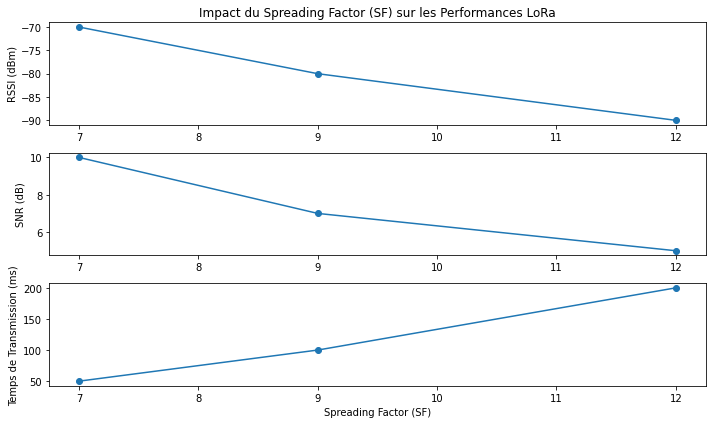

In [1]:
import matplotlib.pyplot as plt

# Données fictives pour illustration
sf_values      = [7, 9, 12]
rssi_values    = [-70, -80, -90]
snr_values     = [10, 7, 5]
tx_time_values = [50, 100, 200]

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(sf_values, rssi_values, 'o-')
plt.title('Impact du Spreading Factor (SF) sur les Performances LoRa')
plt.ylabel('RSSI (dBm)')

plt.subplot(3, 1, 2)
plt.plot(sf_values, snr_values, 'o-')
plt.ylabel('SNR (dB)')

plt.subplot(3, 1, 3)
plt.plot(sf_values, tx_time_values, 'o-')
plt.xlabel('Spreading Factor (SF)')
plt.ylabel('Temps de Transmission (ms)')

plt.tight_layout()
plt.show()

### Envoi de données de capteurs
Dans cette partie du TP, nous allons ajouter un capteur de distance à la carte LoPy4 et intégrer ses mesures dans notre système de communication LoRa. Nous utiliserons un capteur de distance à ultrasons (par exemple, le capteur HC-SR04).

<img src="img/capteur.png" alt="Drawing" style="width: 500px;"/>

Voici une fonction pour mesurer la distance à l'aide d'un capteur de distance à ultrasons connecté à la carte LoPy4 :

In [ ]:
def distance():
    #initialisation des pins
    trig = Pin('P23', mode = Pin.OUT)
    echo = Pin('P22', mode = Pin.IN)
    
    # envoie d'une impulsion de 10us
    trig.value(0)
    time.sleep(2/1000000)
    trig.value(1)
    time.sleep(10/1000000)
    trig.value(0)
    
    # mesure du temps de propagation
    while echo() == 0:
        pass
    start = utime.ticks_us()

    while echo() == 1:
        pass
    finish = utime.ticks_us()
    
    duree = finish-start
    
    # calcul de la distance
    distance = duree * 340 / 2 / 10000 # 340 : vitesse du son en m/s / 2 : aller-retour / 10000 : pour passer de µs en s
    
    return distance

s.send(bytes("data","utf-8")) permet d'envoyer des données via LoRa

Integrez le code du capteur de distance dans le code vu dans la partie 1 afin d'envoyer les données du capteur à The Things Network

Nous allons maintenant utiliser l'api de The things Network pour récupérer le données du capteur de distance depuis n'importe ou.
Pour cela créez une clé API TTN en allant sur https://eu1.cloud.thethings.network/console/applications puis dans votre application créez une clé api

Le code suivant permet de récupérer les données envoyés dans votre appplication.
- pensez a bien changer le username, le mot de passe et le device_name

In [ ]:
import base64
import struct
import paho.mqtt.subscribe as subscribe
import paho.mqtt.publish as publish
import json
import time

mqtt_username = "" #TODO mettre votre username
password = "" #TODO mettre votre mot de passe
device_name = "" #TODO mettre votre nom d'appareil

topics=['v3/'+mqtt_username+'/devices/'+device_name+'/up']
topicsdown=['v3/'+mqtt_username+'/devices/'+device_name+'/down/push']
auth={'username':mqtt_username,'password':password}
hostname="eu1.cloud.thethings.network"
port = 1883

def send(data ,f_port=1 ):
    data = base64.b64encode(data)
    data=data.decode()
    publish.single(topicsdown[0], '{"downlinks":[{"f_port": '+str(f_port)+',"frm_payload":"'+ data+'","priority": "NORMAL"}]}', hostname=hostname, port=port, auth=auth)




def recieve():
    m = subscribe.simple(topics, hostname=hostname, port=port, auth=auth, msg_count=1)

    message = json.loads(m.payload)
    data = message['uplink_message']['frm_payload']
    data = base64.b64decode(data.encode())
    data=data.hex()
    return data

def send_int(data : int):
    send(bytes([data]),2)

def send_float(data : float):
    send(struct.pack("f", data),3)

def send_str(data : str):
    send(data.encode(),4)



while 1 :
    
    data=recieve()
    
    print(data)

    send_int(4)
    send_float(0.2)
    send_str("coucou")
    time.sleep(5)


print("fini")